In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from utils import process_config,frame_factory,frame_diff,thresh_otsu,concatenate,resize_and_gray,show_img,open_op,PIL_filter,\
plt_show,shape_filter

In [2]:
params=process_config('..\\config.cfg')
frames=frame_factory(params)

In [3]:
%matplotlib inline
import io
import matplotlib.image as mpimg
from IPython.display import Image,display

In [4]:
scaled_img,gray_img=resize_and_gray(frames[1],True)
#gray_img=cv2.equalizeHist(gray_img)

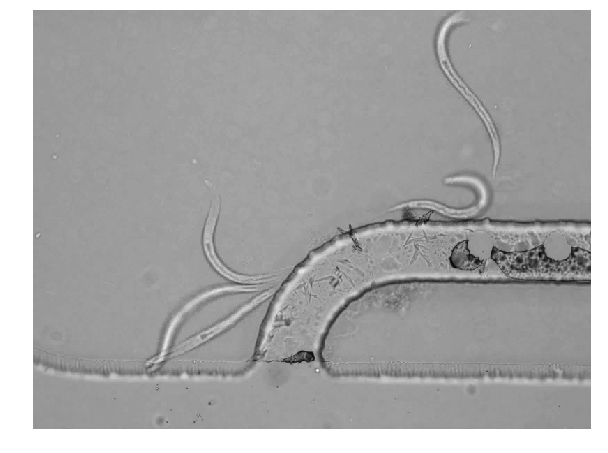

In [8]:
plt_show(gray_img)
filters=PIL_filter('EDGE_ENHANCE_MORE')
cv2.imshow('f',filters.filter(gray_img).astype(np.uint8))
k = cv2.waitKey(0) 
cv2.destroyAllWindows()

In [6]:
frames=frame_factory(params)
bs = cv2.createBackgroundSubtractorKNN(detectShadows=True)
fgbg = cv2.createBackgroundSubtractorMOG2()
for i in range(200):
    img,gray=resize_and_gray(frames[i],True)
    #gray=filter_img.filter(gray)
    fgmask = fgbg.apply(gray)
    bsmask = bs.apply(gray)
    #cv2.imshow('frame',concatenate(img,fgmask))
    cv2.imshow('bs',np.concatenate([bsmask,fgmask],axis=1))
    k = cv2.waitKey(10) 
    if k == 27:
        break
    else:
        continue
cv2.destroyAllWindows()
#bk=fgbg.getBackgroundImage()
#plt_show(bk)

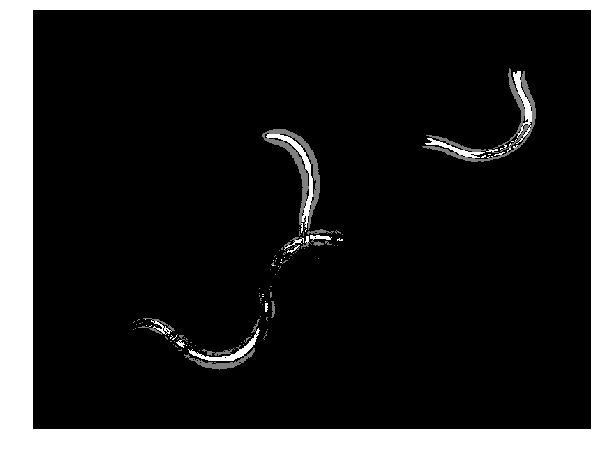

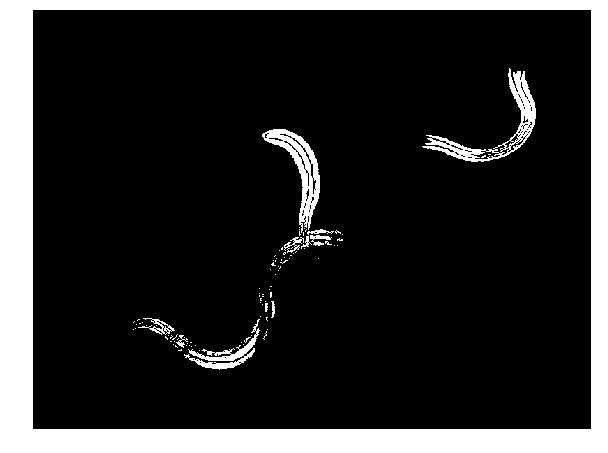

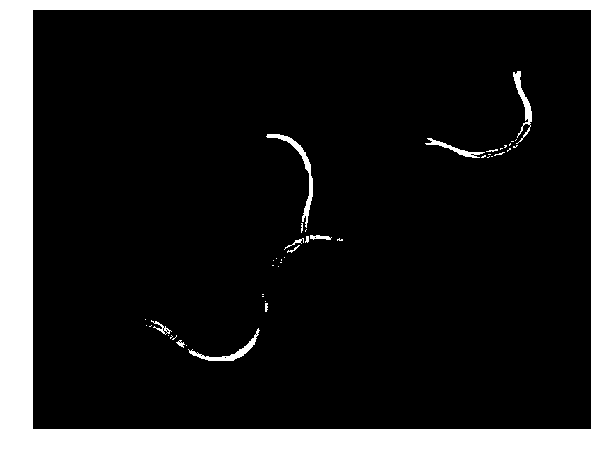

In [7]:
img,gray=resize_and_gray(frames[200],True)
fgmask = fgbg.apply(gray)
plt_show(fgmask)
ret, bg = cv2.threshold(fgmask,126,255,cv2.THRESH_BINARY)
ret, fg = cv2.threshold(fgmask,128,255,cv2.THRESH_BINARY)
plt_show(bg)
plt_show(fg)

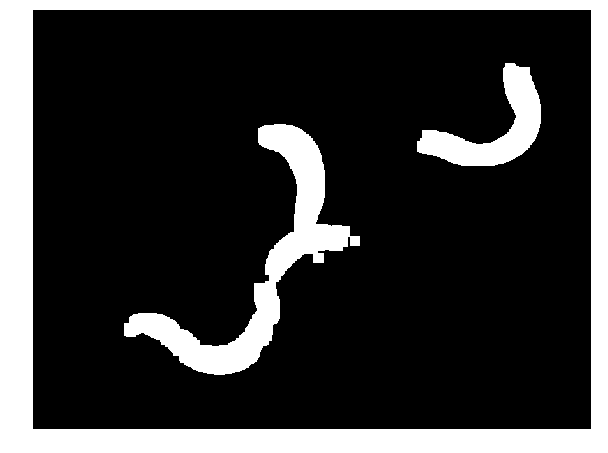

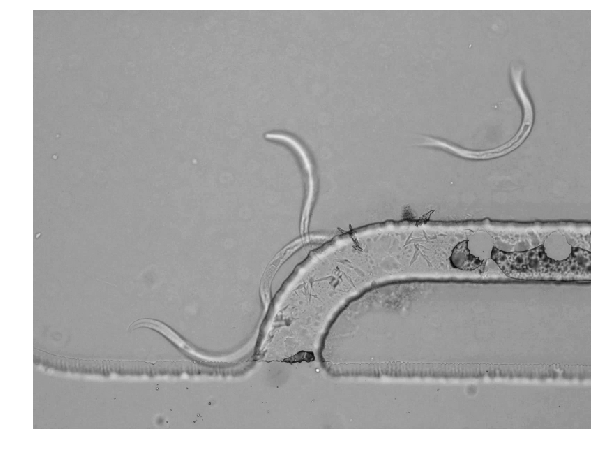

In [9]:
#noise remove
kernel2 = np.ones((2,2),np.uint8)
kernel3 = np.ones((3,3),np.uint8)
bg_1=cv2.dilate(bg,kernel3,iterations=7)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel3, iterations = 3)
#bg_2 = cv2.morphologyEx(bg_1,cv2.MORPH_CLOSE,kernel2, iterations = 4)
plt_show(bg_1)
plt_show(gray)

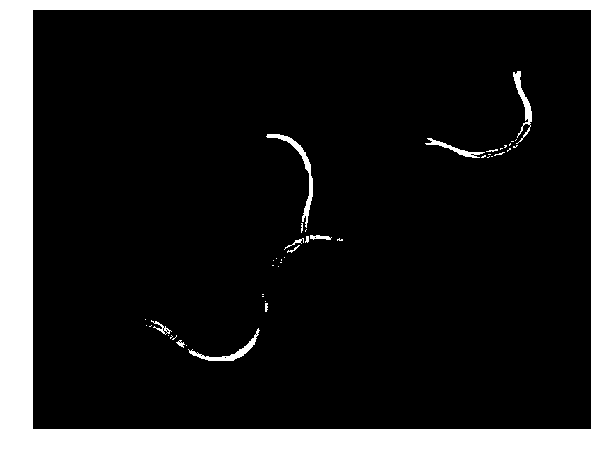

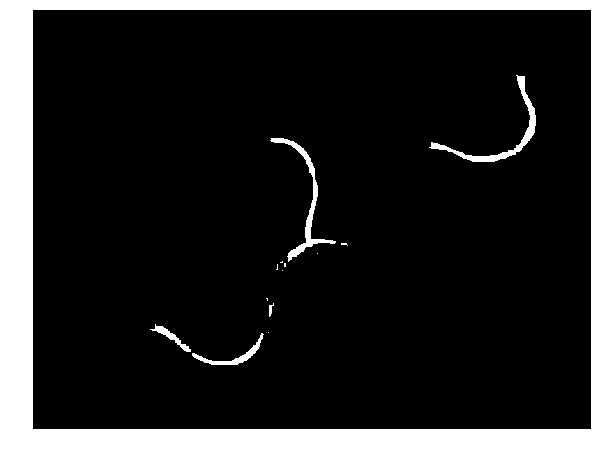

In [10]:
plt_show(fg)
fg_1=cv2.morphologyEx(fg,cv2.MORPH_CLOSE,kernel2, iterations = 6)
plt_show(fg_1)

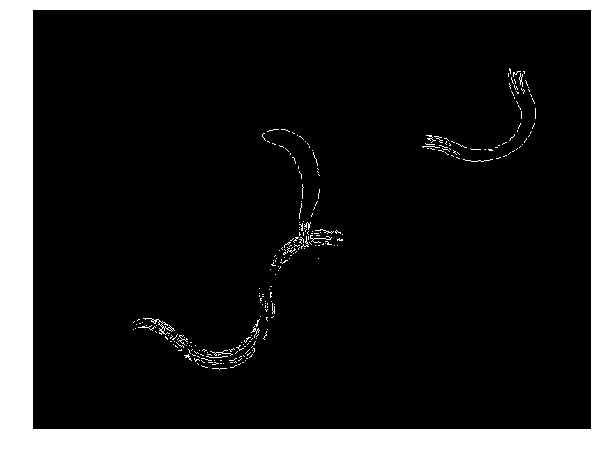

In [11]:
shape_filter(bg)

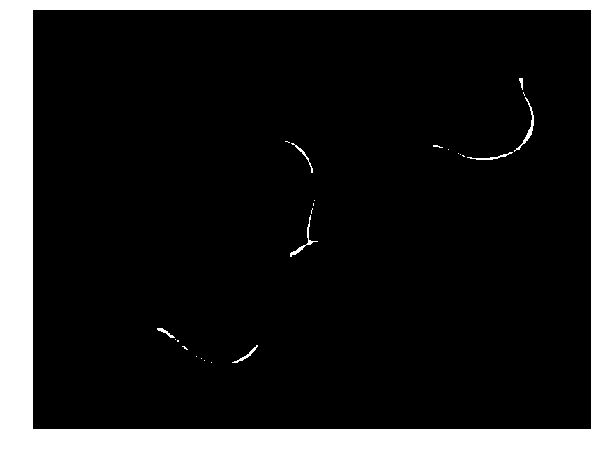

In [12]:
image,contours,hier = cv2.findContours(fg_1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
image_=cv2.drawContours(image,contours,-1,(0,0,255),3) 
plt_show(image_)

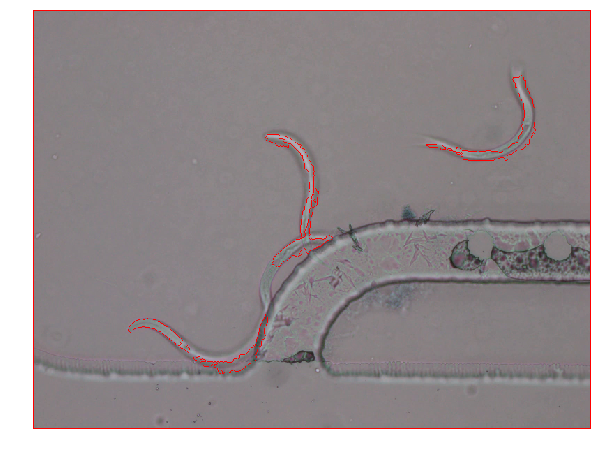

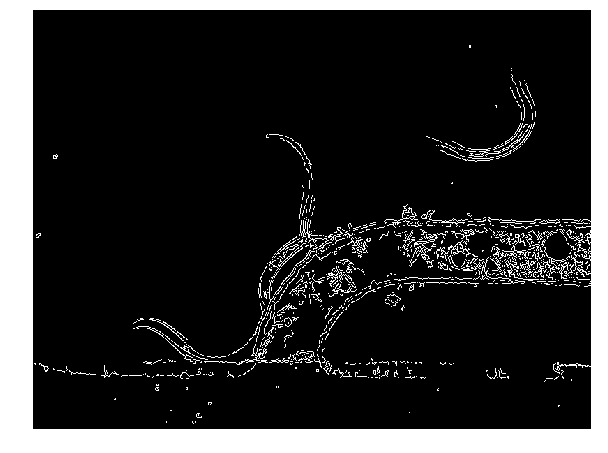

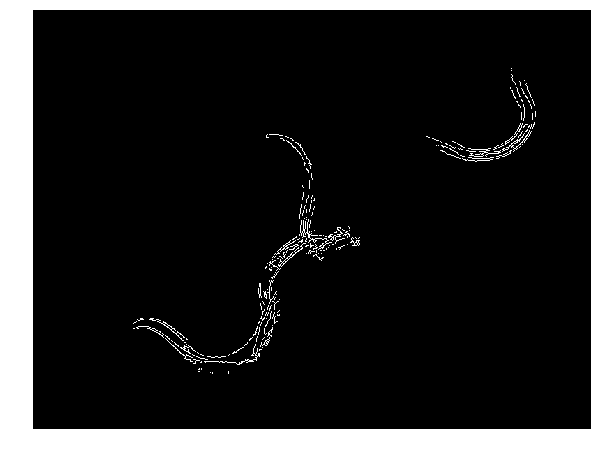

In [13]:
unknown = cv2.subtract(bg_1,fg_1) 
ret, markers = cv2.connectedComponents(fg_1)
markers = markers+1
markers[unknown==255] =0
markers = cv2.watershed(img,markers)
img[markers==-1]=(255,0,0)
edge=cv2.Canny(gray,40,110)
edge_=edge*bg_1
plt_show(img)
plt_show(edge)
plt_show(edge_)